## Importación de librerías necesarias

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import statsmodels.api as sm

## Configuración de estidos para las gráficas

In [84]:
sns.set(style='whitegrid', palette='muted', color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

## Carga del conjunto de datos

In [85]:
data = pd.read_csv('turkiye-student-evaluation_generic.csv')
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Selección de las preguntas relevantes

In [86]:
questions_keys = [f'Q{i}' for i in range(13, 29)]
questions_data = data[questions_keys]
questions_data

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Generación y visualización de la matriz de correlación

In [87]:
correlation_matrix = questions_data.corr()
correlation_matrix

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
Q13,1.000000,0.935892,0.911332,0.895858,0.840693,0.890268,0.882982,0.880842,0.872650,0.867404,0.872573,0.855763,0.867371,0.855618,0.826879,0.855105
Q14,0.935892,1.000000,0.929818,0.888821,0.876135,0.894998,0.890565,0.895837,0.886756,0.886897,0.874134,0.855911,0.890835,0.863121,0.825664,0.868156
Q15,0.911332,0.929818,1.000000,0.894843,0.879264,0.889927,0.888218,0.889175,0.886022,0.887481,0.875622,0.854493,0.886061,0.861506,0.821760,0.865047
Q16,0.895858,0.888821,0.894843,1.000000,0.802596,0.909753,0.881118,0.866393,0.852203,0.849080,0.889466,0.881254,0.853153,0.860446,0.845358,0.832746
Q17,0.840693,0.876135,0.879264,0.802596,1.000000,0.845704,0.862591,0.869337,0.869451,0.874888,0.816596,0.788361,0.874025,0.817704,0.766645,0.856770
Q18,0.890268,0.894998,0.889927,0.909753,0.845704,1.000000,0.904496,0.881115,0.873145,0.874138,0.883972,0.872558,0.861272,0.855463,0.833772,0.843775
Q19,0.882982,0.890565,0.888218,0.881118,0.862591,0.904496,1.000000,0.911703,0.897596,0.892604,0.889861,0.869429,0.878977,0.867957,0.840367,0.864018
Q20,0.880842,0.895837,0.889175,0.866393,0.869337,0.881115,0.911703,1.000000,0.927675,0.912638,0.892795,0.863808,0.893836,0.868952,0.832817,0.884905
Q21,0.872650,0.886756,0.886022,0.852203,0.869451,0.873145,0.897596,0.927675,1.000000,0.941408,0.891903,0.861022,0.904486,0.867752,0.836925,0.888167
Q22,0.867404,0.886897,0.887481,0.849080,0.874888,0.874138,0.892604,0.912638,0.941408,1.000000,0.900714,0.866384,0.913781,0.870339,0.836404,0.894154


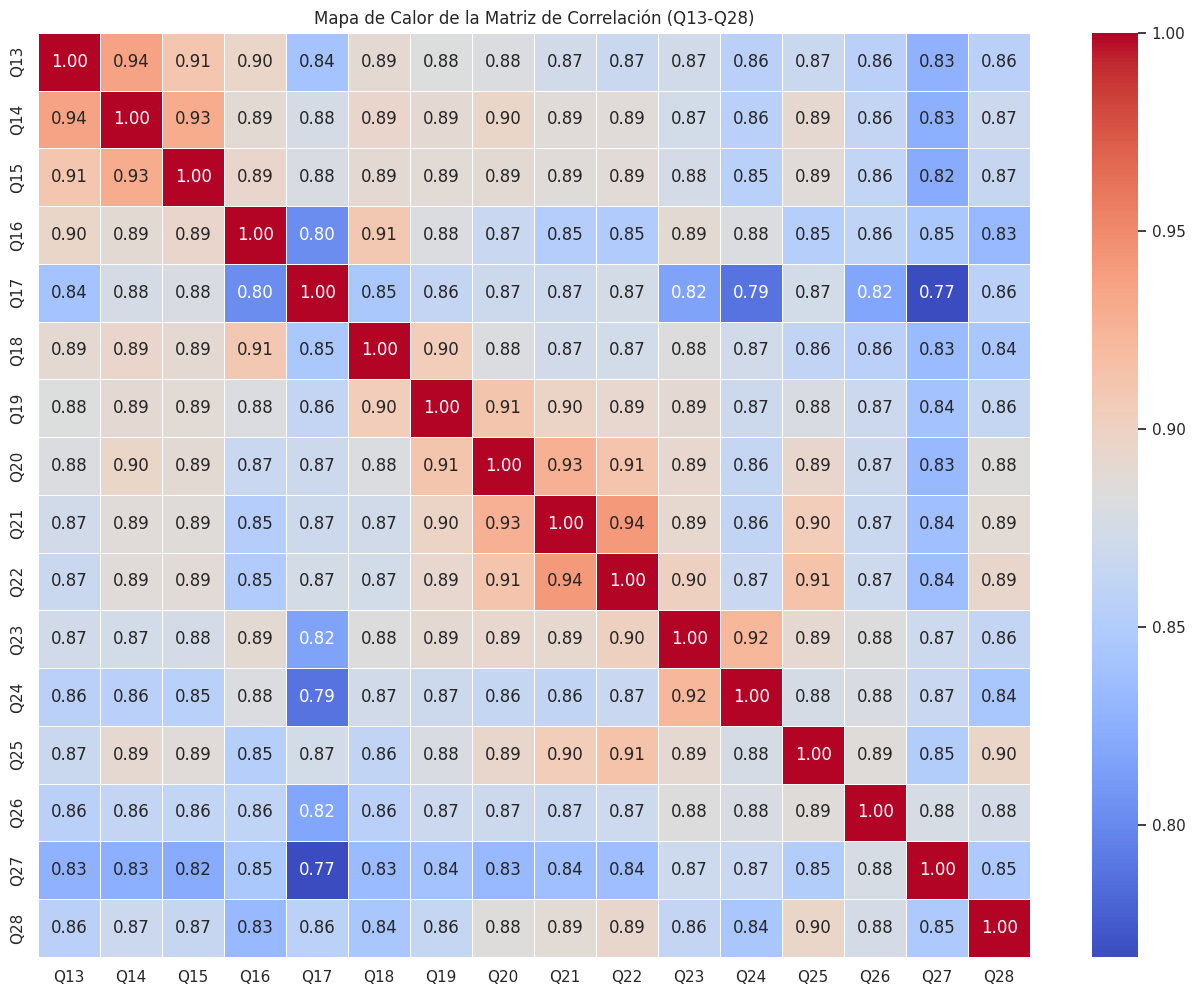

In [88]:

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación (Q13-Q28)')
plt.show()

## Análisis Exploratorio de Datos (EDA)
### Estadistica descriptiva

In [89]:
questions_data.describe()

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


### Distribución de cada pregunta de interés

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


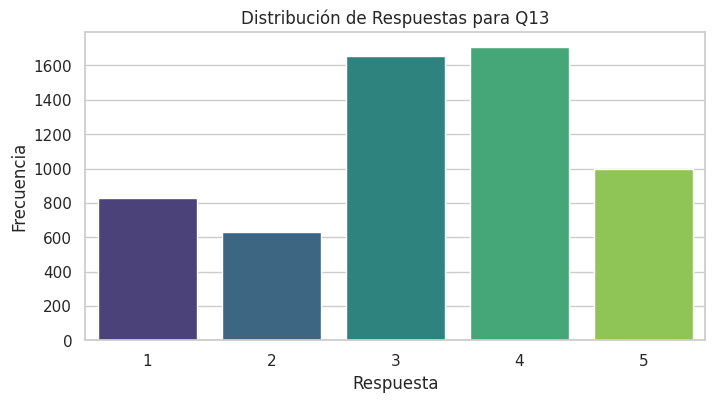

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


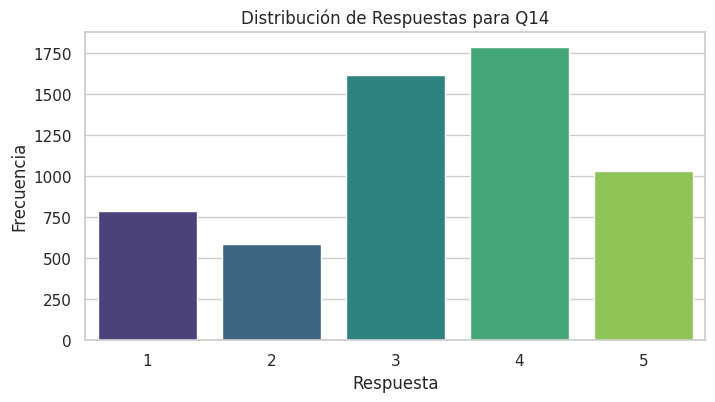

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


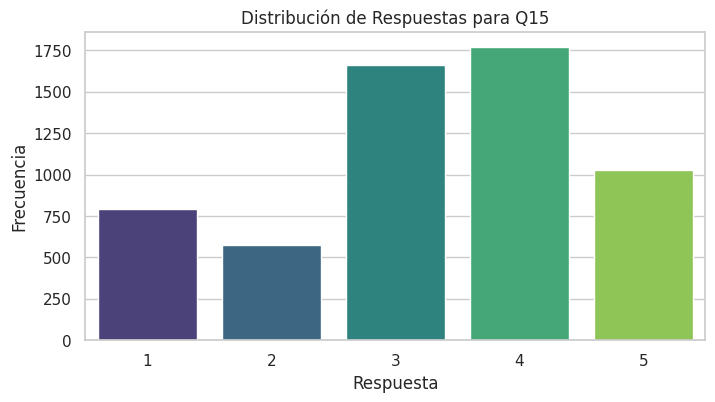

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


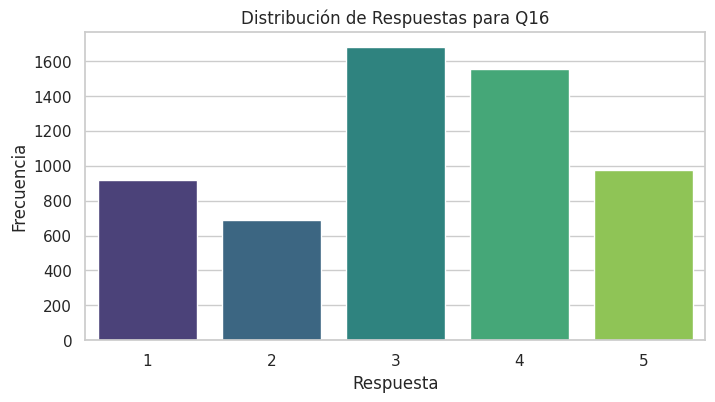

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


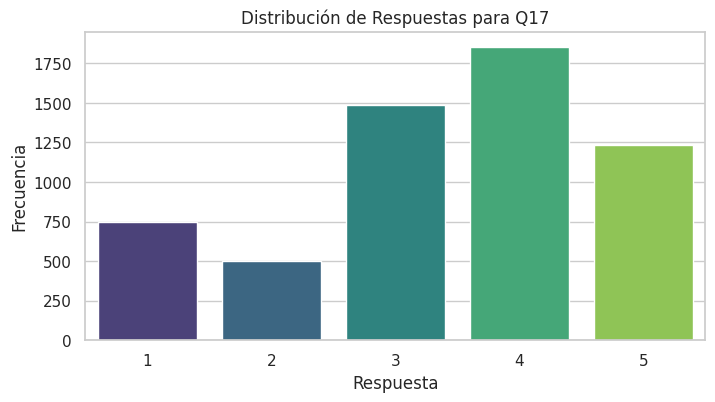

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


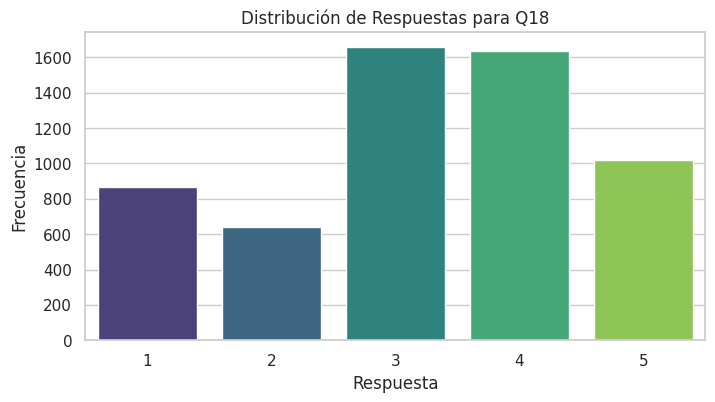

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


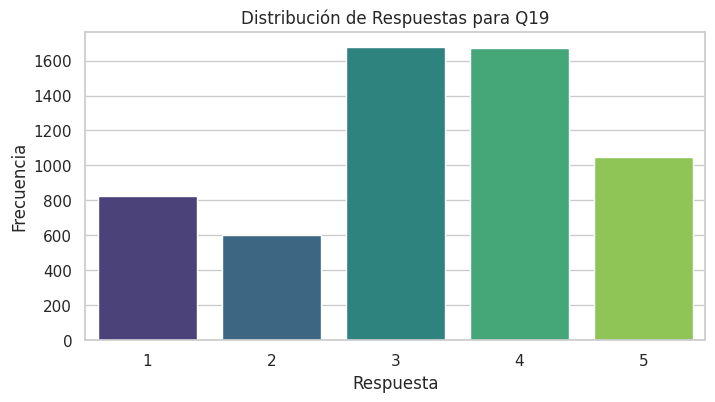

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


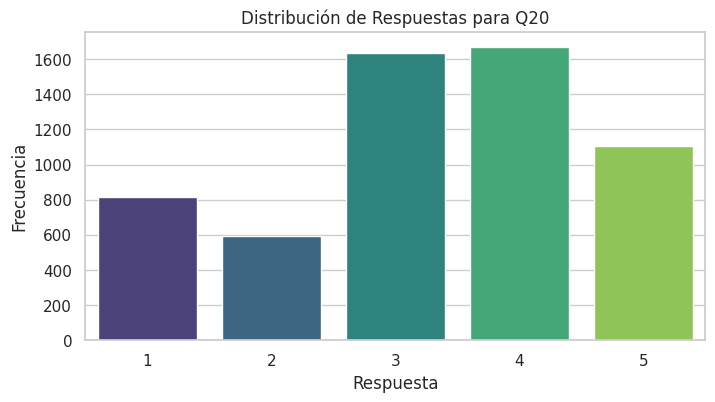

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


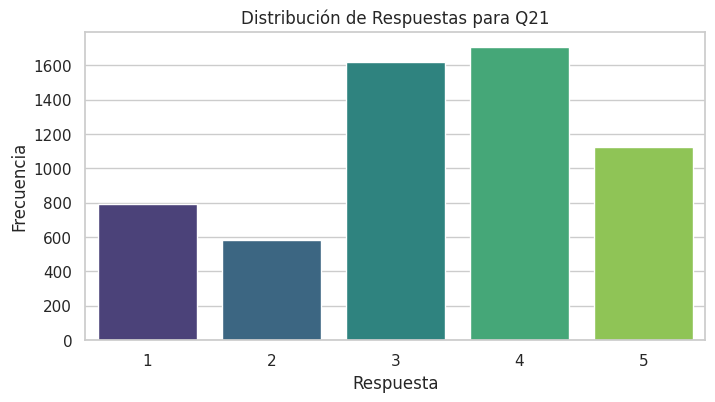

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


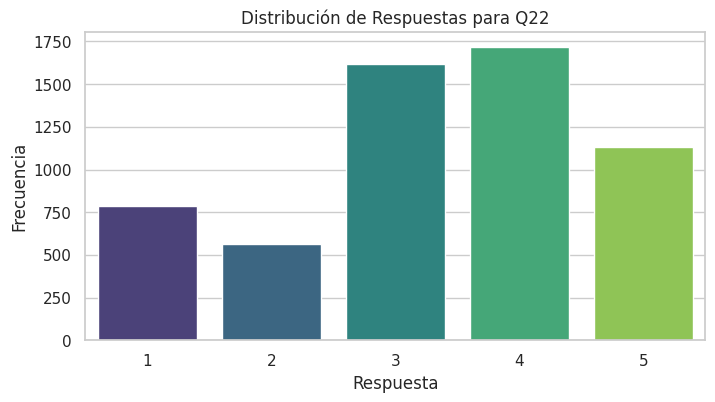

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


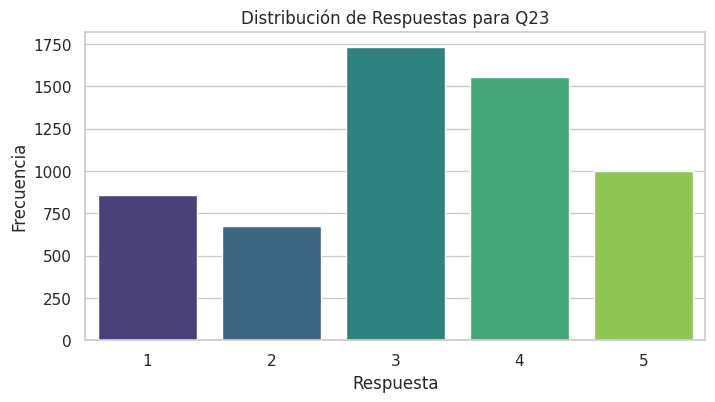

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


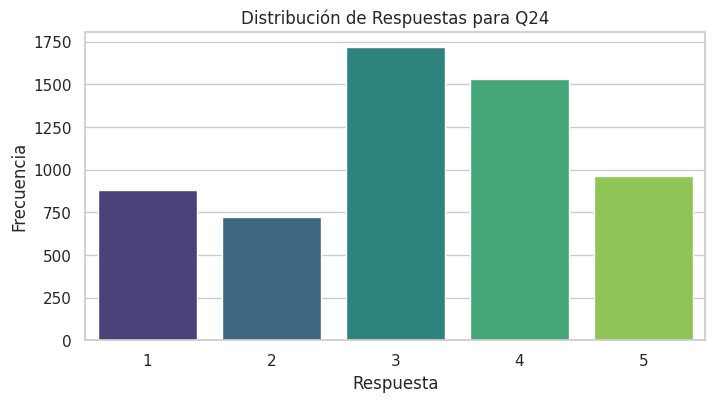

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


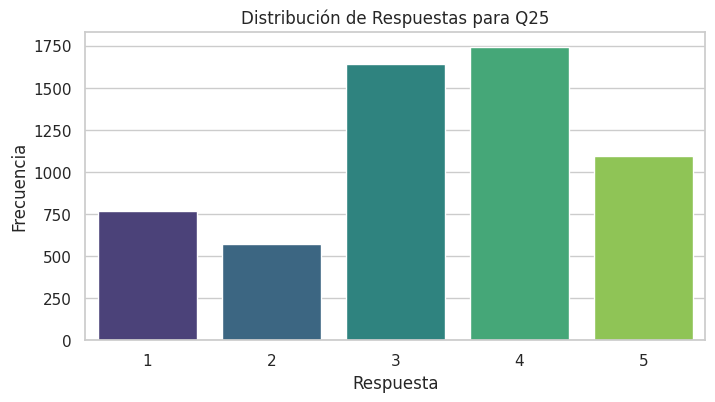

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


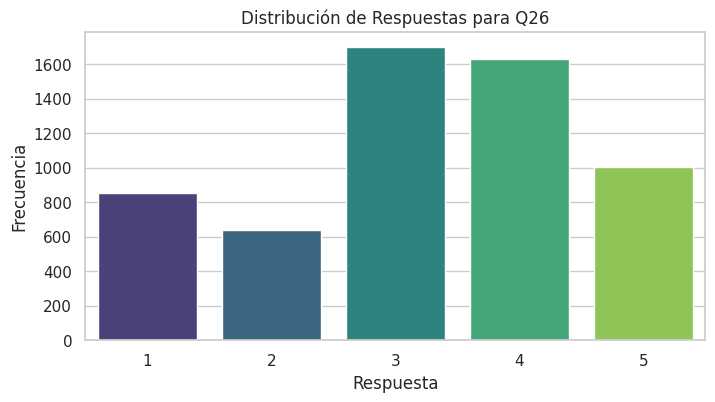

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


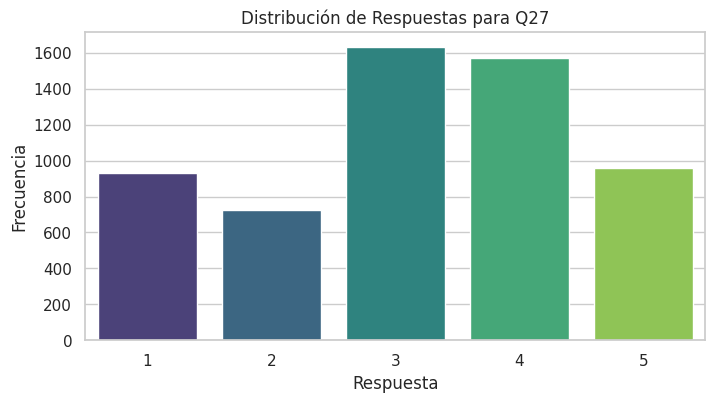

/tmp/ipykernel_195336/1651915706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=question, data=questions_data, palette='viridis')


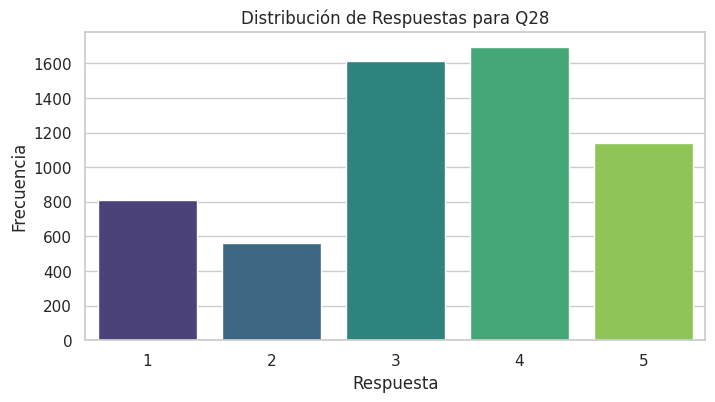

In [90]:
for question in questions_keys:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=question, data=questions_data, palette='viridis')
    plt.title(f'Distribución de Respuestas para {question}')
    plt.xlabel('Respuesta')
    plt.ylabel('Frecuencia')
    plt.show()

### Gráficos de caja para detección de posibles datos anómalos

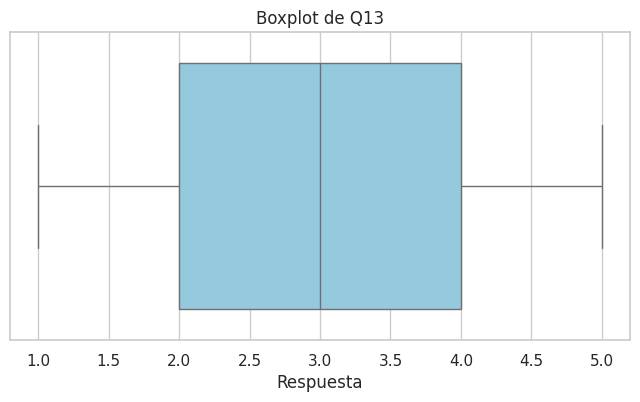

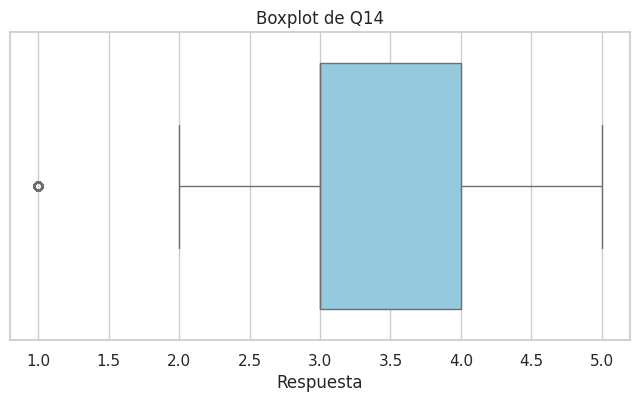

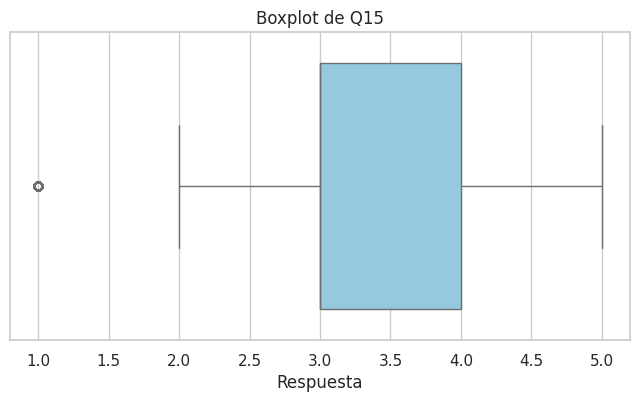

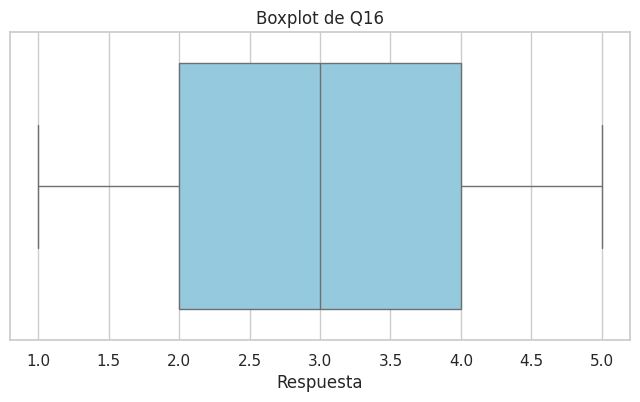

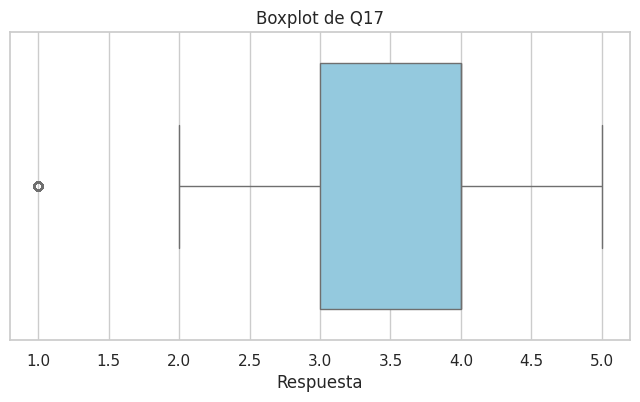

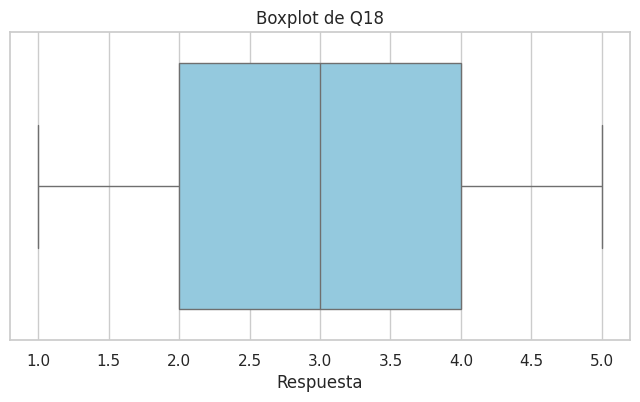

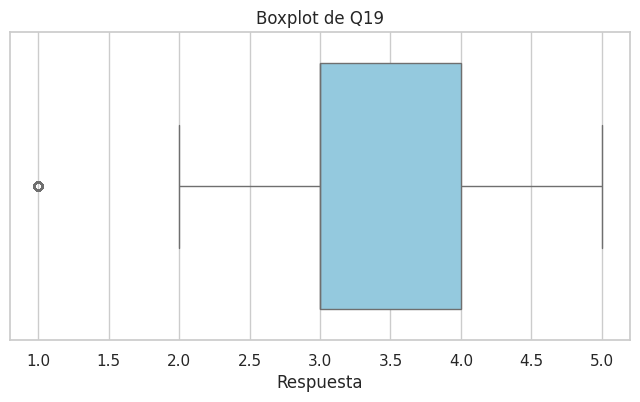

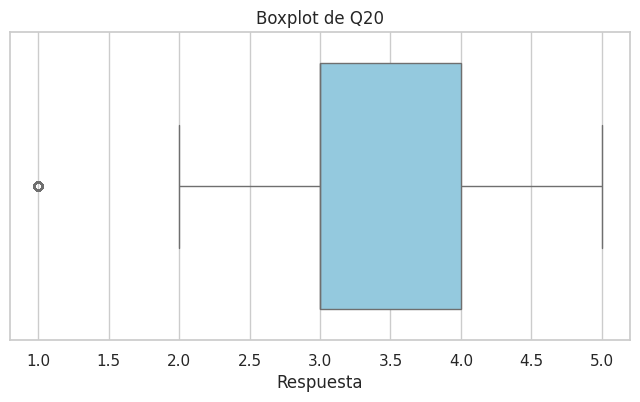

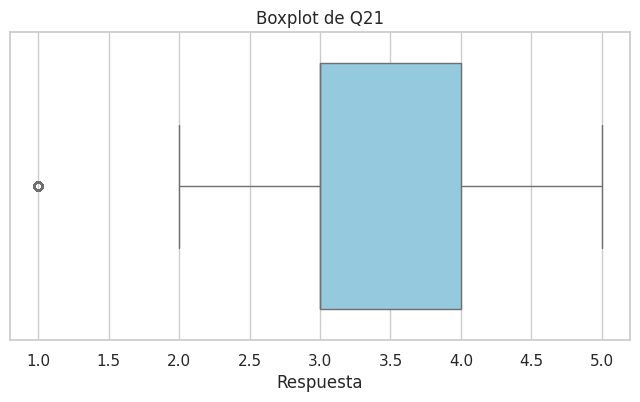

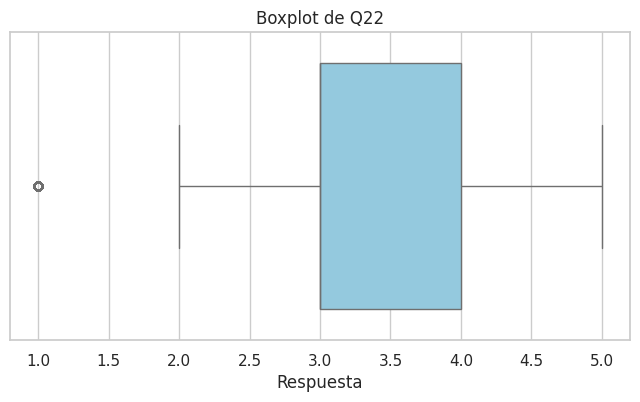

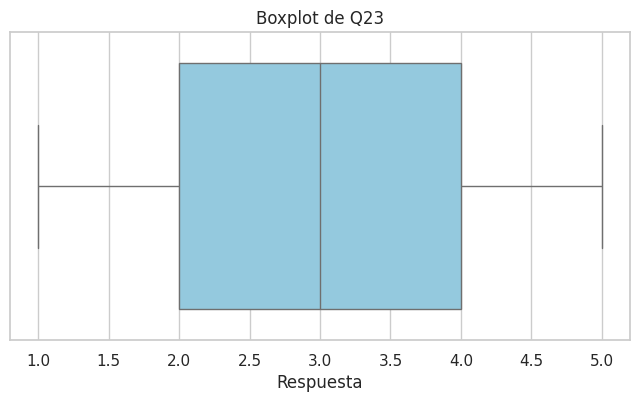

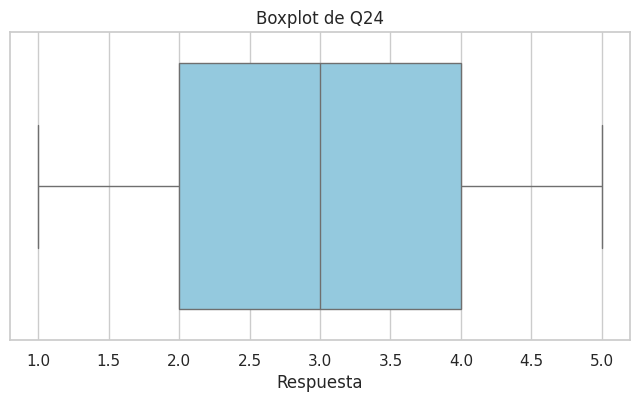

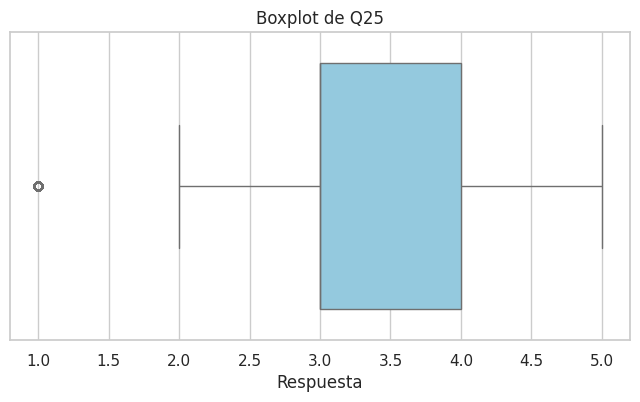

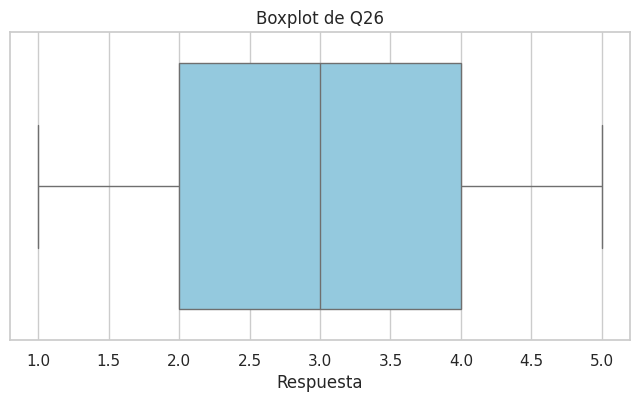

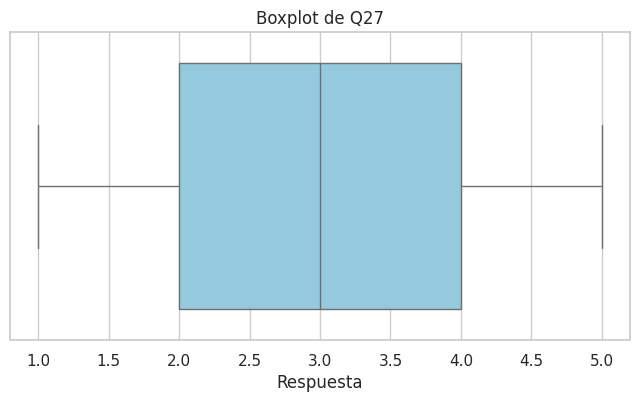

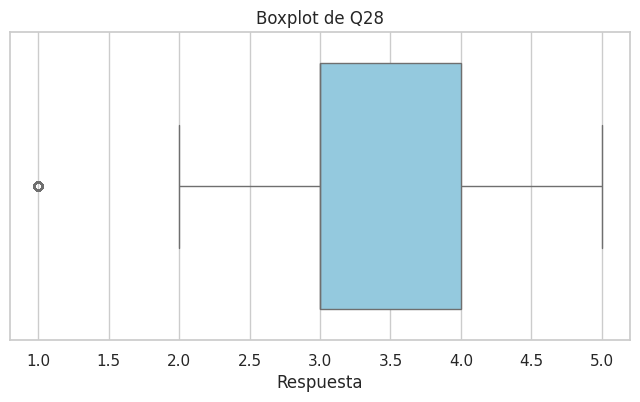

In [91]:
for question in questions_keys:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=questions_data[question], color='skyblue')
    plt.title(f'Boxplot de {question}')
    plt.xlabel('Respuesta')
    plt.show()

## Escalamiento de los datos

Los datos no requieren ser normalizados debido a que estos se encuentran en una codificación ordinal simple. Sin embargo, se realiza un escalamiento estandar y una codificación One-Hot sobre el conjunto de datos.

### Escalamiento estadar

In [92]:
standard_scaler = StandardScaler()
stardard_scaled_data = standard_scaler.fit_transform(questions_data)
standard_scaled_df = pd.DataFrame(stardard_scaled_data, columns=questions_keys)
standard_scaled_df

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


### Escalamiento One-Hot

In [93]:
one_hot_encoder = OneHotEncoder()
one_hot_encoded_data = one_hot_encoder.fit_transform(questions_data)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=one_hot_encoder.get_feature_names_out(questions_data.columns))
one_hot_encoded_df

,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,...,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5816,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5817,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Cálculo de número de componentes a utilizar usando PCA y la varinza acumulativa

Se ha probado valores desde el 90% al 95%

7

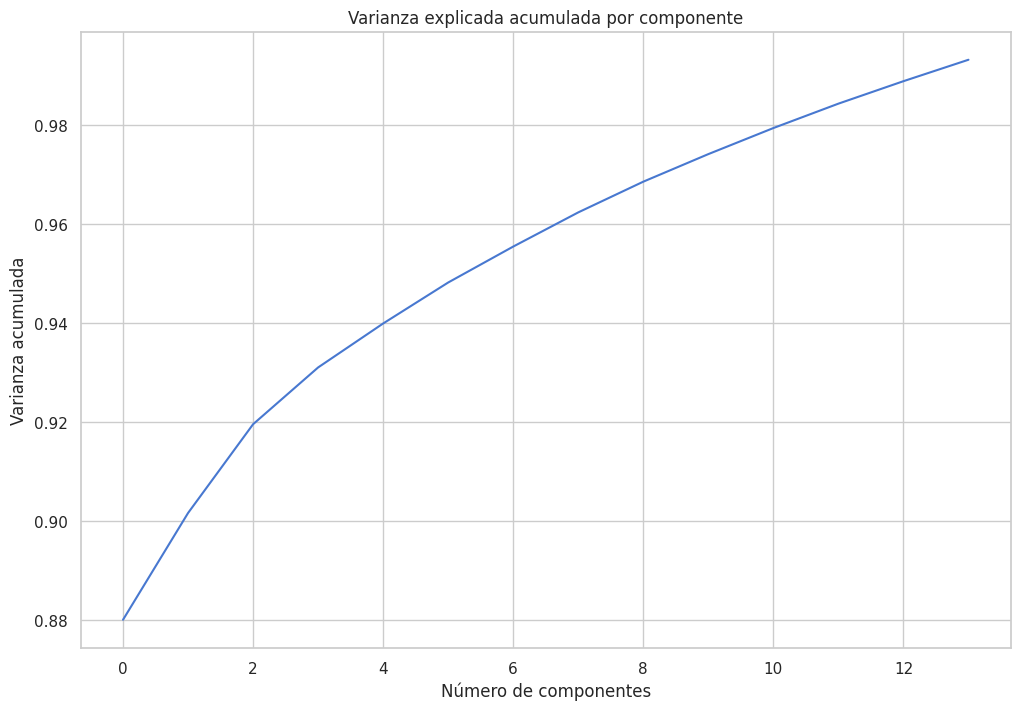

In [94]:
pca = PCA("mle")
pca.fit(questions_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

threshold = 0.95
num_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= threshold) + 1
display(num_components)

plt.plot(cumulative_variance)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada por componente')
plt.grid(True)
plt.show()

## Visualización 2D de los 2 componentes principales usando PCA

/tmp/ipykernel_195336/1142471614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data['PCA1'] = pca_result[:, 0]
/tmp/ipykernel_195336/1142471614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data['PCA2'] = pca_result[:, 1]


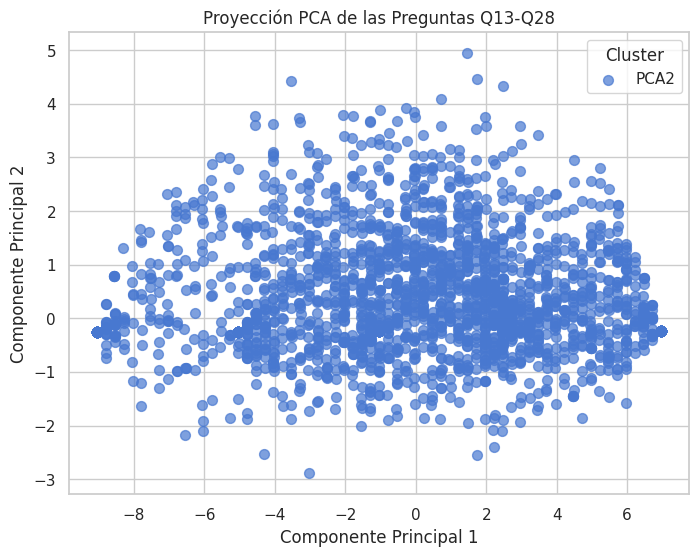

In [95]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(questions_data)

questions_data['PCA1'] = pca_result[:, 0]
questions_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x='PCA1', y='PCA2', data=questions_data, marker='o', s=50, alpha=0.7)
plt.title('Proyección PCA de las Preguntas Q13-Q28')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Visualización 2D de los 2 componentes principales usando t-SNE

/tmp/ipykernel_195336/3235372590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data['tSNE1'] = tsne_result[:, 0]
/tmp/ipykernel_195336/3235372590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data['tSNE2'] = tsne_result[:, 1]
/tmp/ipykernel_195336/3235372590.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tSNE1', y='tSNE2', data=questions_data, palette='viridis')


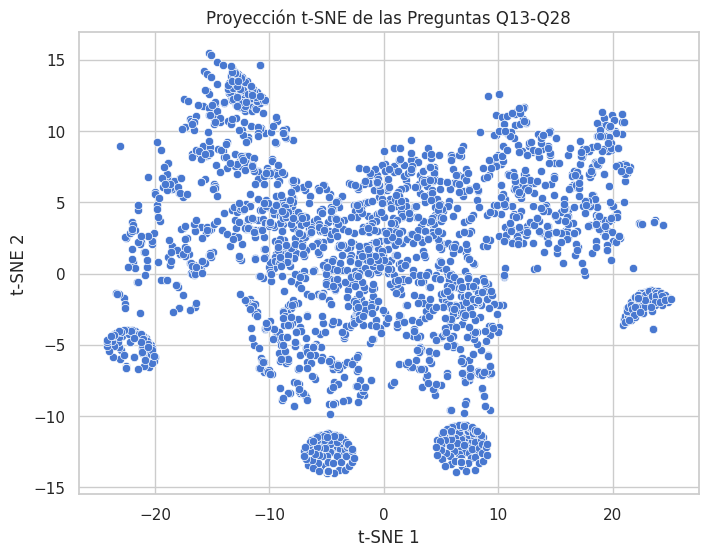

In [96]:
tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(questions_data[questions_keys])

# Añadir los componentes t-SNE al DataFrame
questions_data['tSNE1'] = tsne_result[:, 0]
questions_data['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', data=questions_data, palette='viridis')
plt.title('Proyección t-SNE de las Preguntas Q13-Q28')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## Clustering

Determinación del número óptimo de clusters usando el método del codo

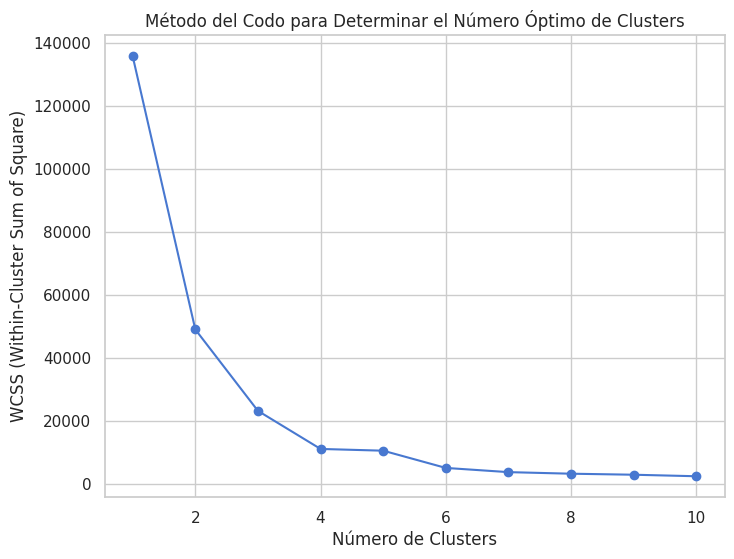

In [97]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(questions_data[['PCA1', 'PCA2']])  # Usando componentes PCA
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

Según la gráfica anterior, el número de custers óptimo puede estar entre 

In [98]:
for i in (3, 4):
    kmeans = KMeans(n_clusters=i, random_state=0)
    questions_data[f'Cluster{i}'] = kmeans.fit_predict(questions_data[['PCA1', 'PCA2']])

/tmp/ipykernel_195336/3052064816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data[f'Cluster{i}'] = kmeans.fit_predict(questions_data[['PCA1', 'PCA2']])
/tmp/ipykernel_195336/3052064816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_data[f'Cluster{i}'] = kmeans.fit_predict(questions_data[['PCA1', 'PCA2']])


## Visualización de los clusters en el espacion PCA

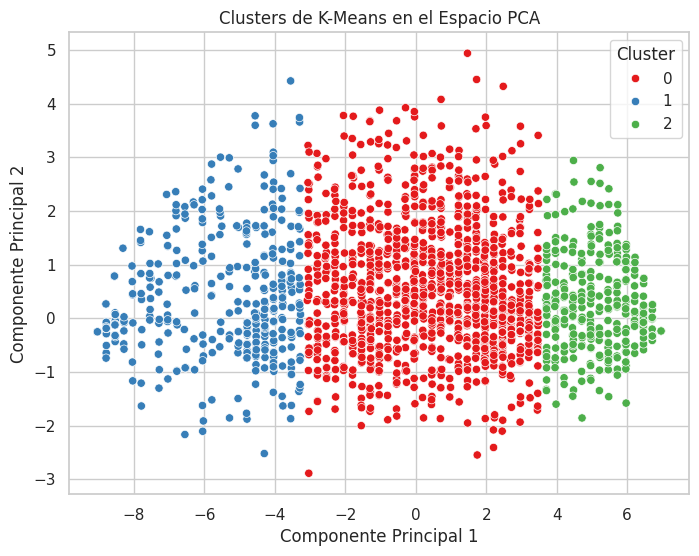

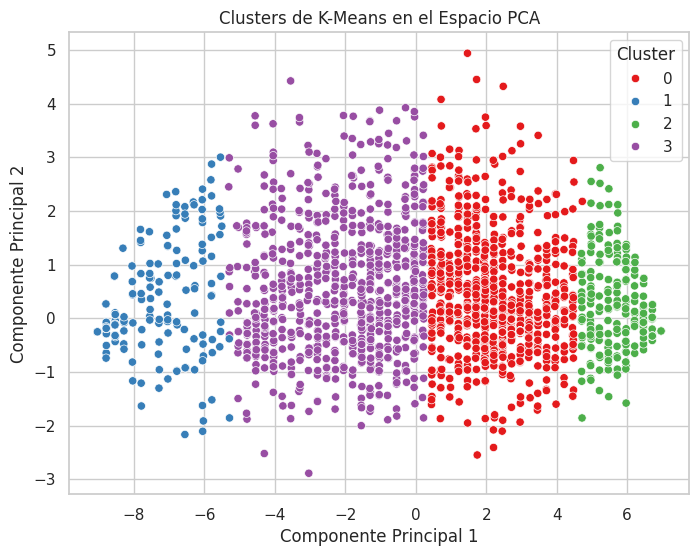

In [99]:
for i in (3, 4):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=f'Cluster{i}', data=questions_data, palette='Set1')
    plt.title('Clusters de K-Means en el Espacio PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='Cluster')
    plt.show()

## Visualización de los clusters en el espacio t-SNE

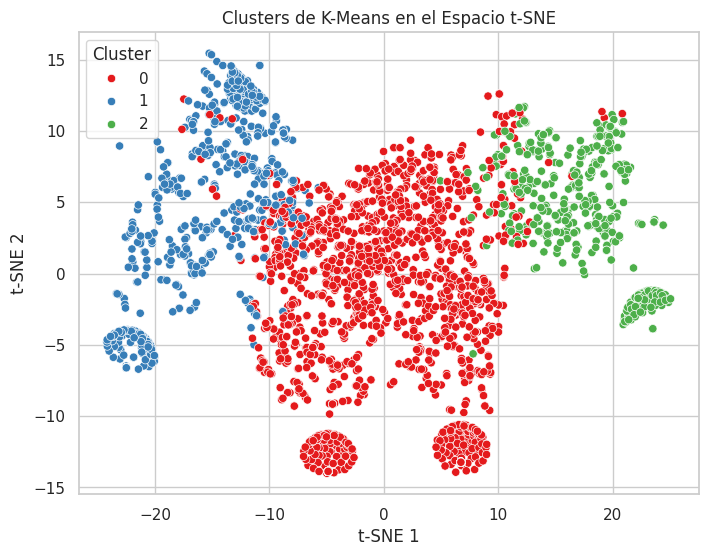

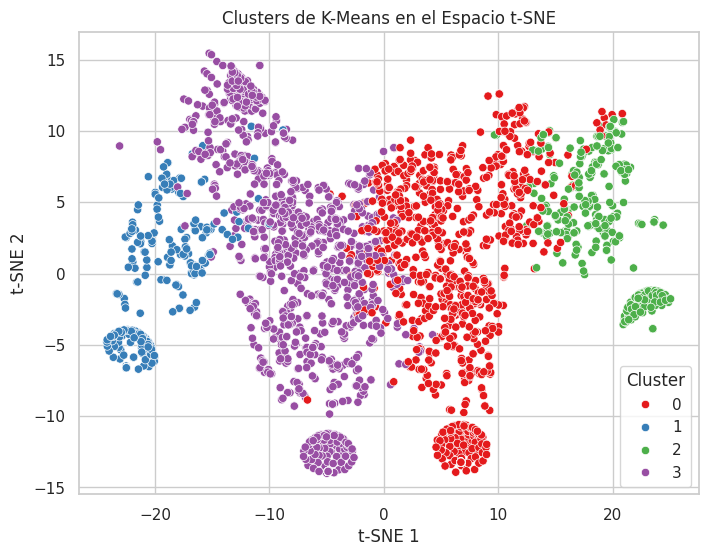

In [100]:
for i in (3, 4):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='tSNE1', y='tSNE2', hue=f'Cluster{i}', data=questions_data, palette='Set1')
    plt.title('Clusters de K-Means en el Espacio t-SNE')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster')
    plt.show()